In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network10 as model

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.015, rho=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.015, clipnorm=0.9, momentum=0.95, nesterov=True, name='SGD')

net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network10-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)
csv_log = tf.keras.callbacks.CSVLogger('../trainLog/'+dir_name, separator=',', append=False)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=60, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

=========================] - 10s 16ms/step - loss: 0.2672 - tp: 320175.0000 - fp: 19249.0000 - tn: 320175.0000 - fn: 19249.0000 - acc: 0.0154 - precision: 0.9433 - recall: 0.9433 - auc: 0.9851 - binary_accuracy: 0.9433 - binary_crossentropy: 0.1554 - val_loss: 0.2422 - val_tp: 138982.0000 - val_fp: 6486.0000 - val_tn: 138982.0000 - val_fn: 6486.0000 - val_acc: 0.0000e+00 - val_precision: 0.9554 - val_recall: 0.9554 - val_auc: 0.9958 - val_binary_accuracy: 0.9554 - val_binary_crossentropy: 0.0781
Epoch 24/60
663/663 [==============================] - 10s 16ms/step - loss: 0.2632 - tp: 319986.0000 - fp: 19438.0000 - tn: 319986.0000 - fn: 19438.0000 - acc: 0.0141 - precision: 0.9427 - recall: 0.9427 - auc: 0.9850 - binary_accuracy: 0.9427 - binary_crossentropy: 0.1557 - val_loss: 0.1945 - val_tp: 137517.0000 - val_fp: 7951.0000 - val_tn: 137517.0000 - val_fn: 7951.0000 - val_acc: 0.0000e+00 - val_precision: 0.9453 - val_recall: 0.9453 - val_auc: 0.9911 - val_binary_accuracy: 0.9453 - val_

In [16]:
from utils.evl_metrics import getTrainMetricValue
results  = net.evaluate(X_test, y_test, verbose=1)
getTrainMetricValue(net, results)

loss :  0.2224503606557846

tp :  202174.0

fp :  5637.0

tn :  202174.0

fn :  5637.0

acc :  0.0

precision :  0.9728744029998779

recall :  0.9728744029998779

auc :  0.9968684315681458

binary_accuracy :  0.9728744029998779

binary_crossentropy :  0.072150319814682



In [10]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)

TrueNegatives result:  126650.0
TruePositives result:  75524.0
FalseNegatives result:  286.0
FalsePositives result:  5351.0
Recall result:  0.9962274
Precision result:  0.93383616


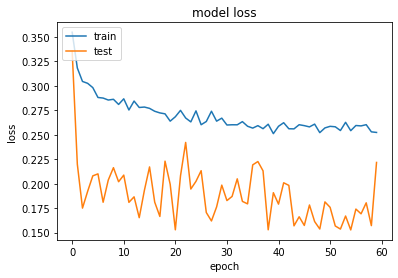

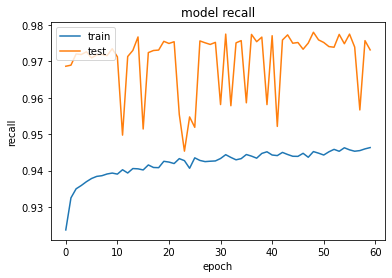

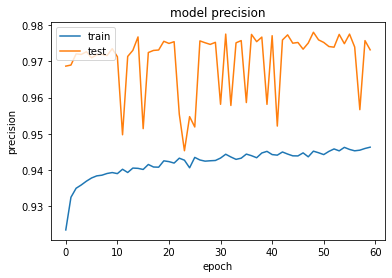

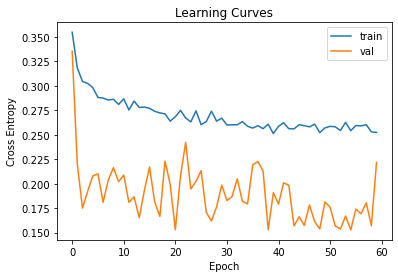

In [11]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)